#### Ali Awais Safdar - 369475
#### Syed Usman Ali Shah - 386543
#### BSCS11A - DL(GRP-01) - Assignment (2)

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
)


In [3]:
import pandas as pd

# Specify the absolute file path to the train.csv file
train_csv_path = 'Train.csv'

# Load the train.csv file into a DataFrame
train_df = pd.read_csv(train_csv_path, header=None, names=['filename', 'class'])

# Convert values in the 'filename' column to strings
train_df['filename'] = train_df['filename'].astype(str)

# Convert values in the 'class' column to strings
train_df['class'] = train_df['class'].astype(str)

# Add file extensions to filenames in DataFrame
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.splitext(x)[0] + '.png')


# Define data generator for training set using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='Train',  # Specify the directory containing the images
    x_col='filename',  # Column containing image filenames
    y_col='class',  # Column containing class labels
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print("Length of train generator:", len(train_generator))


Found 10000 validated image filenames belonging to 250 classes.
Length of train generator: 313


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation for validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the validation.csv file into a DataFrame
val_csv_path = 'Validation.csv'

val_df = pd.read_csv(val_csv_path, header=None, names=['filename', 'class'])

# Convert values in the 'filename' column to strings
val_df['filename'] = val_df['filename'].astype(str)

# Convert values in the 'class' column to strings
val_df['class'] = val_df['class'].astype(str)

val_df['filename'] = val_df['filename'].apply(lambda x: os.path.splitext(x)[0] + '.png')

# Define data generator for validation set using flow_from_dataframe
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='Validation',  # Specify the directory containing the images
    x_col='filename',  # Column containing image filenames
    y_col='class',  # Column containing class labels
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Length of val generator:", len(val_generator))

Found 5000 validated image filenames belonging to 250 classes.
Length of val generator: 157


In [6]:
from tensorflow.keras.applications import VGG19, ResNet50
vgg_model1 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
for layer in vgg_model1.layers:
    layer.trainable = False

model = Sequential([
    vgg_model1,
    GlobalAveragePooling2D(),
    # Dense(1024, activation='relu'),
    # Dense(512, activation='relu'),
    # Dense(256, activation='relu'),
    Dense(1024, activation='relu'),
    BatchNormalization(),  # Add batch normalization for stabilizing training
    Dropout(0.5),          # Add dropout for regularization
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),          # Add dropout for regularization
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(250, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         


 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
          

In [9]:
# Train the model and store training history
history = model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    verbose=1  # Set verbose to 1 to see training progress
)

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
313/313 [==============================] - 94s 273ms/step - loss: 4.1508 - accuracy: 0.1469 - val_loss: 4.6096 - val_accuracy: 0.0668
Epoch 2/25
313/313 [==============================] - 79s 253ms/step - loss: 2.7999 - accuracy: 0.3379 - val_loss: 2.9935 - val_accuracy: 0.3020
Epoch 3/25
313/313 [==============================] - 78s 250ms/step - loss: 2.3100 - accuracy: 0.4321 - val_loss: 2.6423 - val_accuracy: 0.3898
Epoch 4/25
313/313 [==============================] - 80s 256ms/step - loss: 2.0818 - accuracy: 0.4691 - val_loss: 2.4550 - val_accuracy: 0.4134
Epoch 5/25
313/313 [==============================] - 78s 248ms/step - loss: 1.8991 - accuracy: 0.5071 - val_loss: 2.5343 - val_accuracy: 0.3892
Epoch 6/25
313/313 [==============================] - 80s 256ms/step - loss: 1.7447 - accuracy: 0.5346 - val_loss: 2.7884 - val_accuracy: 0.3738
Epoch 7/25
313/313 [==============================] - 81s 258ms/step - loss: 1.6511 - accuracy: 0.5577 - val_loss: 2.6218 - val_ac

In [10]:
## THIS CREATES A CSV FILE WITH IMAGE PATHS 
import os
import csv

# Define the folder path
test_dir = "Test"

# Get all filenames in the folder
filenames = os.listdir(test_dir)

# Create a CSV file and write filenames to it
csv_file = "testset.csv"
with open(csv_file, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Filename"])  # Write header if needed
    writer.writerows([[filename] for filename in filenames])

print(f"CSV file '{csv_file}' created successfully.")

CSV file 'testset.csv' created successfully.


In [14]:
import os
import cv2
import numpy as np

# Define a function to preprocess images
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)  # Read image
    img = cv2.resize(img, target_size)  # Resize image to target size
    img = img / 255.0  # Normalize pixel values
    return img

# Define target size (height, width) expected by your model
target_size = (224, 224)

# Directory containing test images
test_dir = "Test"

# Get list of all image files in the directory
image_files = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Preprocess test images and make predictions
predictions = []

for image_file in image_files:
    # Preprocess image
    preprocessed_image = preprocess_image(image_file, target_size)
    # Add batch dimension to the image as model.predict() expects batch input
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    # Make prediction
    prediction = model.predict(preprocessed_image)
    # Append prediction to list of predictions
    predictions.append(prediction)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Load label data
label_df = pd.read_csv("modified_labels.csv")

# Create a DataFrame to store predicted labels alongside filenames
test_df = pd.DataFrame({"Filename": filenames})

# Map predicted class indices to class names using label_df
# class_names = label_df[' object'].tolist()  # Use ' object' with a space
class_names = label_df['class'].tolist()

# Store class names next to image paths in the original CSV file
test_df['Predicted_Label'] = [class_names[pred.argmax()] for pred in predictions]

# Write the updated DataFrame to a new CSV file
predicted_csv_file = "predicted_testset.csv"
test_df.to_csv(predicted_csv_file, index=False)

print(f"Predicted labels CSV file '{predicted_csv_file}' created successfully.")

# Print the updated test_df with predicted classes
test_df.head()

1/1 [==============================] - 0s 21ms/step
Predicted labels CSV file 'predicted_testset.csv' created successfully.


,Filename,Predicted_Label
0,img_1000061.png,220
1,img_1000636.png,244
2,img_1001266.png,9
3,img_1004991.png,32
4,img_1007083.png,194


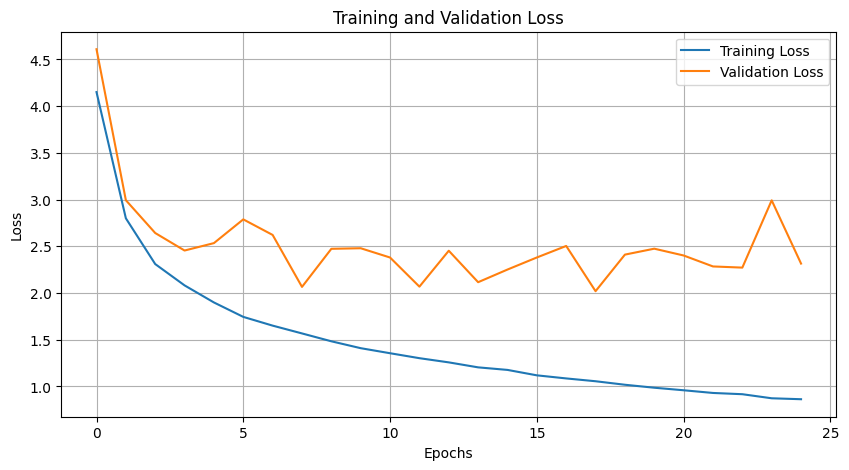

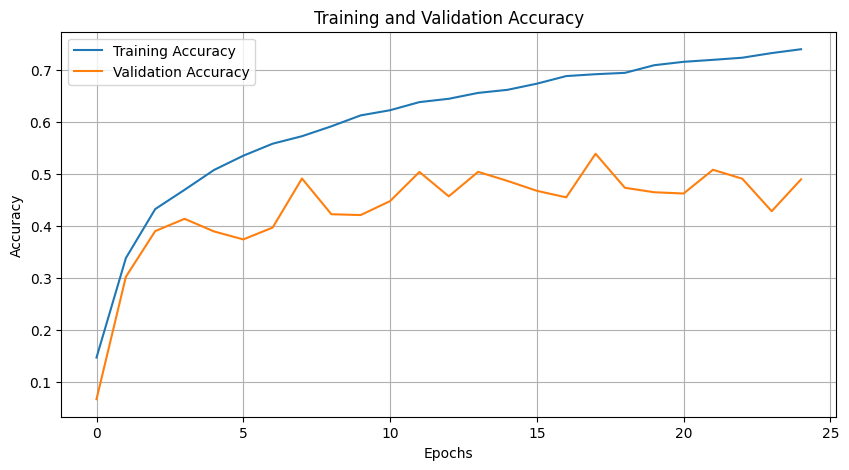

In [15]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()